# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Проект сопровождался следующей запиской с описанием содержания столбцов:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

In [1]:
# импорт необходимых для работы библиотек

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [2]:
# поиск датасета в разных директориях и сохранение в переменную data

try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    try:
        data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
    except:
        print('Файл не обнаружен')

Выведем общую информацию о количестве строк в датасете, типе данных, количестве пропусков:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Оценим аномалии в датасете через основные статистические показатели.

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Из обзора видно, что формат записи некоторых столбцов противоречит змеиной нотации, пропуски присутствуют больше чем в половине колонок и достигают при этом половины от всех записей. Стандартное отклонение для большинства ключевых признаков велико, что говорит о присутствии выбросов в данных. Нам предстоит определить причины этого и от выбросов избавиться. Скорее всегда из-за выбросов характер распределения сильно отклоняется от нормального. Некоторые типы данных записаны неверно. Нарушен стиль наименования признаков.

## Предобработка данных

Исправим некорректные данные в датасете. По ряду признаков возможно осмысленно заполнить пропуски, реконструировав логику заполнения строк пользовалем. Для некоторых признаков пропуски можно восстановить, обратившись к соседним столбцам. Забегая вперед, отметим, что обработка пропусков - деликатный процесс, потому что в погоне за снижением числа NaN можно сравнять все выраженные отличия медианным значением. Поэтому для выведения корреляции будет корректно оставить некоторые пропуски незаполненными, если отсутствует какая-то убедительная гипотеза об их причинах, и, главное, истинном значении.

Выведем долевое соотношение пропущенных значений по каждому признаку:

In [5]:
data.isna().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
ponds_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
first_day_exposition    0.000000
last_price              0.000000
total_area              0.000000
studio                  0.000000
rooms                   0.000000
floor                   0.000000
open_plan               0.000000
total_images            0.000000
dtype: float64

По некоторым признакам пропусков настолько много, что получить по ним достоверные выводы вряд ли получится. Разберем каждый из них

1. `is_apartment`

88% значений пропущено, это легко объяснить: их появление наверняка связано с тем, что для квартир, не являющихся апартаментами, этот параметр просто редко отмечается, поэтому все NaN по смыслу эквивалентны False.

2. `parks_nearest`, `parks_around3000`, `ponds_nearest`, `ponds_around3000` 

Скорее всего качество аэрофотосъемки не позволило установить количество прудов и парков поблизости большинства объектов, либо на используемой карте не был нанесен населенный пункт. В ТЗ на исследование не упоминается необходимость исследовать эти признаки, но если это понадобится, то пропуски можно восстановить, обратившись к автору датасета. 
 
3. `balcony`

Если количество балконов не указано, скорее всего их попросту нет. Заменим пропуски на нули.

4. `ceiling_height` 

Высота потолков является одним из важных исследуемых признаков. Высоту можно восстановить, узнав адрес объекта, оценив медианное значение высоты потолков строений схожей этажности или усреднив данные по населенному пункту. Однако все эти гипотезы равнозначны между собой, не исключают существования иных гипотез, дадут разный результат, поэтому гарантированно исказят данные. Поэтому за неимением лучшего решения оставим в колонке 38% пропусков.

5. `airports_nearest` и `cityCenters_nearest`

Пропусков относительно немного, и значение в колонке можно заменить медианным для каждого населенного пункта.

 
6. `days_exposition` 

Пропусков всего 13%. Более того, некоторые объекты на момент формирования датасета еще могли быть актуальны, поэтому реальное время продажи квартиры установить не удастся.

7. `kitchen_area` и `living_area`

Эти параметры связаны друг с другом через параметр `total_area`, поэтому пропуски можно восстановить через него. Также можно узнать усредненное для всех объектов соотношение общей площади к площади кухни и к жилой площади, и если стандартное отклонение окажется не слишком велико, то заполнить пропуски исходя из этих соображений.


Дополнительно нужно проверить корректность записи названия всех населенных пунктов

### Изменение стиля заголовков

В первую очередь, следует поправить все некорректно записанные названия столбцов. В соответствии со змеимным регистром правильные названия будут выглядеть так:

* cityCenters_nearest → city_centers_nearest
* parks_around3000 → parks_around_3000
* ponds_around3000 → ponds_around_3000

In [6]:
# Переименование несольких столбцов

data.rename(columns={'cityCenters_nearest':'city_centers_nearest',
                     'parks_around3000':'parks_around_3000',
                     'ponds_around3000': 'ponds_around_3000'}, inplace=True)

### Является ли квартира апартаментом `is_apartment`

Заполним пропуски в соответствии с выдвинутой гипотезой

In [7]:
data['is_apartment'].fillna(False, inplace=True)

### Число балконов `balcony`

Оценим вариативность признака

In [8]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Все значения укладываются в пределы разумного, дробных значений нет. Проведем замены в соответствии с предложенной идеей, одновременно заменив тип данных на более подходящий.

In [9]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

### Высота потолков `ceiling_height`

Оценим расброс не пропущенных значений при помощи диаграммы размаха, заранее ограничив выводимый диапазон для визуальной наглядности.

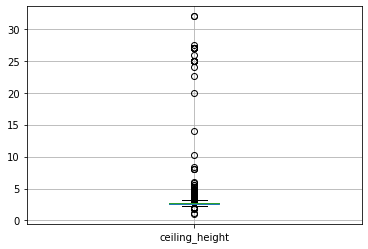

In [10]:
data[data['ceiling_height']<100].boxplot(column='ceiling_height');

Итак, большинство значений адекватны, однако теперь видно, что есть целая серия подозрительных значений свыше 5 м. Выведем на экран этот хвост.

In [11]:
display(data.query('ceiling_height>5')['ceiling_height'].sort_values().tail(10))

display(f'Всего квартир с потолками выше 5 м: {data[data["ceiling_height"]>5].shape[0]}')

17857     27.0
5246      27.0
20478     27.0
4876      27.0
21824     27.0
22938     27.0
21377     27.5
3148      32.0
22336     32.0
22869    100.0
Name: ceiling_height, dtype: float64

'Всего квартир с потолками выше 5 м: 36'

Действительно, если квартиры с потолками до пяти метров еще могут встречаться в старом жилом фонде Санкт-Петербурга, то 8, 25 и тем более 100 метров настораживают. В признаке присутствуют выбросы

### Название населенного пункта `locality_name`

Исследуем характер записи названия населенных пунктов.

In [12]:
data['locality_name'].head(70).unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг'], dtype=object)

В столбце присутствуют неявные дубликаты, например, "посёлок Мурино" и "поселок Мурино". Проверить их все вручную практически невозможно, поэтому напишем функцию, удаляющую из колонки тип населенного пункта. Все названия приведем к нижнему регистру.

In [13]:
def type_deleter(var):
    
    types = ['посёлок', 'поселок', 'городской', 'городского', 'деревня', 'типа', 'имени', 
             'садовое', 'товарищество', 'село', 'садоводческое', 'станции',  ]
    try:
        lst = var.lower().split()   # разделение названия НП на слова
        for word in lst[:-1]:       # проходим список с конца, это позволяет не пропускать слова в сравнении
            if word in types:
                lst.remove(word)
        return (' '.join(lst))
    except:
        return np.NaN

In [14]:
display(f'Уникальных населенных пунктов до удаления дубликатов: {len(data["locality_name"].unique())}')

data['locality_name'] = data['locality_name'].apply(type_deleter)

display(f'Уникальных населенных пунктов после удаления дубликатов: {len(data["locality_name"].unique())}')

'Уникальных населенных пунктов до удаления дубликатов: 365'

'Уникальных населенных пунктов после удаления дубликатов: 309'

Рассмотрим новый стиль записи названия населенных пунктов

In [15]:
data['locality_name'].head(70).unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'фёдоровское',
       'выборг'], dtype=object)

Вычислим количество записей, для которых название населенного пункта не указано. 

In [16]:
data['locality_name'].isna().sum()

49

Не так много, чтобы лишить датасет ценной информации, но достаточно, чтобы внести лишний шум, если записи на самом деле не относятся к Ленинградской области. Поэтому такие строки можно удалить.

In [17]:
data.dropna(subset=['locality_name'], inplace=True)

### Расстояние до центра города `city_centers_nearest`

В задании не указано явно, расстояние до центра какого города имеется в виду. Проверим

In [18]:
data[['locality_name','city_centers_nearest']].query('locality_name!="санкт-петербург" & ~city_centers_nearest.isna()').head()

,locality_name,city_centers_nearest
1,шушары,18603.0
6,парголово,19143.0
11,ломоносов,51677.0
13,петергоф,33058.0
14,пушкин,30759.0


Вероятнее всего, все-таки имеется в виду расстояние до центра Санкт-петербурга. Это даем нам возможность заполнить пропущенные значения в столбце медианным для каждого населенного пункта расстоянием до Санкт-Петербурга.

In [19]:
display(f'Пропусков в столбце city_centers_nearest до замены: {data["city_centers_nearest"].isna().sum()}')

data['city_centers_nearest'].fillna(data.groupby('locality_name')['city_centers_nearest'].transform('median'), inplace=True)

display(f'Пропусков в столбце city_centers_nearest после замены: {data["city_centers_nearest"].isna().sum()}')

'Пропусков в столбце city_centers_nearest до замены: 5511'

'Пропусков в столбце city_centers_nearest после замены: 4829'

### Расстояние до ближайшего аэропорта `airports_nearest` 

Аналогично поступим с расстоянием до аэропорта. Судя по стандартному отклонению, в пределах населенного пункта оно изменяется не сильно.

In [20]:
data.groupby('locality_name')['airports_nearest'].describe().sort_values('count', ascending=False).head(8)

,count,mean,std,min,25%,50%,75%,max
locality_name,,,,,,,,
санкт-петербург,15636.0,28046.186237,11557.063820,0.0,18584.25,26757.5,36614.00,54784.0
шушары,436.0,16061.458716,3813.643152,9294.0,12678.00,17427.0,18442.25,26293.0
пушкин,369.0,16447.869919,2493.217619,12157.0,14279.00,15766.0,18539.00,21055.0
колпино,337.0,26375.863501,1578.628611,23649.0,25152.00,26232.0,27542.00,31691.0
парголово,327.0,53994.926606,2991.890807,44346.0,52935.00,53426.0,54061.00,61748.0
петергоф,201.0,40184.676617,4077.653990,34626.0,36675.00,39231.0,45444.00,46535.0
сестрорецк,183.0,56640.486339,2117.862088,50031.0,54526.00,56692.0,57905.00,61872.0
красное село,176.0,26595.579545,2761.538822,23892.0,25276.25,25715.5,27130.75,38367.0


In [21]:
display(f'Пропусков в столбце airports_nearest до замены: {data["airports_nearest"].isna().sum()}')

data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('median'), inplace=True)

display(f'Пропусков в столбце airports_nearest после замены: {data["airports_nearest"].isna().sum()}')

'Пропусков в столбце airports_nearest до замены: 5534'

'Пропусков в столбце airports_nearest после замены: 4829'

### Жилая площадь `living_area`

В колонке встречаются довольно нехарактерные для типичных квартир значения: 2, 409 квадратных метров и т.д.. Оценим их количество

In [22]:
display(f'Квартир с площадью меньше 10 и больше 300 квадратных метров: {data.query("living_area<10 or living_area>300")["living_area"].count()}')

'Квартир с площадью меньше 10 и больше 300 квадратных метров: 32'

Скорее всего данные можно будет отнести к выбросам.

In [23]:
display(f'В столбце пропущено {data["living_area"].isna().sum()} значений')

'В столбце пропущено 1898 значений'

Заполним пропуски через типовое для каждой группы (по количеству комнат) отношение жилой и общей площади. 

In [24]:
data.groupby('rooms')['living_area'].median() / data.groupby('rooms')['total_area'].median()

rooms
0     0.690979
1     0.481796
2     0.575472
3     0.617284
4     0.641206
5     0.626733
6     0.672273
7     0.677570
8     0.683072
9     0.595448
10    0.592076
11    0.708841
12    0.455222
14    0.641519
15    0.693220
16    0.666667
19    0.706086
dtype: float64

In [25]:
(data['living_area']
     .fillna(data['total_area']*(data.groupby('rooms')['living_area'].transform('median') / 
                                 data.groupby('rooms')['total_area'].transform('median')), 
                                 inplace=True))

In [26]:
display(f'Теперь в столбце пропущено {data["living_area"].isna().sum()} значений')

'Теперь в столбце пропущено 0 значений'

### Площадь кухни `kitchen_area`

В некоторых объявлениях площадь кухни не указана, а в некоторых заявлена чрезмерная площадь. Исследуем размах данных в колонке

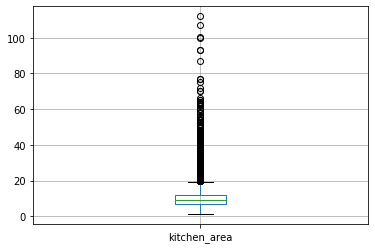

In [27]:
data.boxplot(column='kitchen_area');

In [28]:
display(f'Количество NaN равно: {data["kitchen_area"].isna().sum()}')

display(f'Количество квартир с кухней свыше 30 м2: {data[data["kitchen_area"]>30]["kitchen_area"].count()}')

'Количество NaN равно: 2269'

'Количество квартир с кухней свыше 30 м2: 322'

Поступим с пропущенными значениями так же, как сделали в случае с жилой площадью: выведем характерное для каждого типа квартир отношение площади кухни к общей площади.

In [29]:
data.groupby('rooms')['kitchen_area'].median() / data.groupby('rooms')['total_area'].median()

rooms
0          NaN
1     0.246647
2     0.166038
3     0.130316
4     0.111055
5     0.103107
6     0.105806
7     0.093458
8     0.106067
9     0.047516
10    0.072634
11    0.066702
12    0.124444
14    0.069855
15    0.169492
16    0.048148
19    0.073679
dtype: float64

Как правило, в больших квартирах кухня обратно пропорциональна общей площади, хотя в случае с жилой площащью такой корреляции не было.

In [30]:
(data['kitchen_area']
     .fillna(data['total_area']*(data.groupby('rooms')['kitchen_area'].transform('median') / 
                                 data.groupby('rooms')['total_area'].transform('median')), 
                                 inplace=True))

In [31]:
print(f'Количество NaN равно: {data["kitchen_area"].isna().sum()}')

Количество NaN равно: 197


В таблице остались пропуски, связанные с тем, что ни для одной из квартир, количество комнат в которых ноль, не указана площадь кухни.

In [32]:
data.query('rooms==0 and ~kitchen_area.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Выясним, какое количество квартир с нулем комнат являются студиями.

In [33]:
data.query('rooms==0')['studio'].value_counts()

True     138
False     59
Name: studio, dtype: int64

Две трети - большая часть.

Теперь определим, сколько комнат, как правило, находится в студиях.

In [34]:
data.query('studio==True')['rooms'].value_counts()

0    138
1     11
Name: rooms, dtype: int64

Подавляющее большинство. Из этого можно сделать вывод, что метраж квартиры с нулем комнат можно описать по данным имеющихся в датасете студий

In [35]:
data.query('studio==True and ~kitchen_area.isna()')['kitchen_area'].describe()[['count','std','min','max']]

count    11.000000
std       1.017098
min       5.426225
max       8.385984
Name: kitchen_area, dtype: float64

Одиннадцати наблюдений без явных выбросов будет достаточно

In [36]:
data.loc[data['kitchen_area'].isna() & data['rooms']==0, 'kitchen_area'] = data.query('studio==True and ~kitchen_area.isna()')['kitchen_area'].median()

In [37]:
print(f'Количество NaN равно: {data["kitchen_area"].isna().sum()}')

Количество NaN равно: 0


### Дата публикации `first_day_exposition`

Для определения дня недели, месяца и года публикации колонку с датой необходимо из текстового формата привести к типу `datetime`

In [38]:
data['first_day_exposition'].head(3)

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
Name: first_day_exposition, dtype: object

Часы, минуты и секунды публикации не указаны, поэтому оставим лишь год, месяц и день публикации.

In [39]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

data['first_day_exposition'].head(3)

0   2019-03-07
1   2018-12-04
2   2015-08-20
Name: first_day_exposition, dtype: datetime64[ns]

### Проверка на наличие явных дубликатов

In [40]:
print(f'После предобработки в данных осталось {data.duplicated().sum() } дубликатов')

После предобработки в данных осталось 0 дубликатов


### Вывод

In [41]:
data.isna().mean().sort_values(ascending=False)

parks_nearest           0.659027
ponds_nearest           0.615856
ceiling_height          0.387315
ponds_around_3000       0.232981
parks_around_3000       0.232981
city_centers_nearest    0.204186
airports_nearest        0.204186
days_exposition         0.134461
floors_total            0.003594
living_area             0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
studio                  0.000000
floor                   0.000000
is_apartment            0.000000
open_plan               0.000000
kitchen_area            0.000000
balcony                 0.000000
locality_name           0.000000
total_images            0.000000
dtype: float64

Итак, датасет очищен и обогащен данными. Пропуски были заполнены там, где выдвинутая гипотеза позволяла сделать это без излишнего вредного усреднения. В таблице по-прежнему осознанно оставлены NaN, однако теперь их количество не мешает выполнить исследователький анализ данных.

## Расчёты и добавление результатов в таблицу

Для того, чтобы иметь возможность более объективно сравнивать объекты недвижимости, введем некоторые вспомогательные и удельные параметры.

### Цена за квадратный метр `price_per_square_m`

In [42]:
data.insert(3, 'price_per_square_m', data['last_price']/data['total_area'])

### Год, месяц и день публикации  `exposition_year`, `exposition_month` и `exposition_day`

In [43]:
data.insert(5, 'exposition_year', data['first_day_exposition'].dt.year)

data.insert(6, 'exposition_month', data['first_day_exposition'].dt.month)

data.insert(7, 'exposition_day', data['first_day_exposition'].dt.weekday)

### Этаж квартиры `floor_type`

In [44]:
# добавление колонки в следующую, после 'floor'
data.insert(data.columns.get_loc('floor')+1, 'floor_type', np.NaN)

data['floor_type'] = data.apply(lambda row: 'Первый' if row['floor']==1 
                                else ('Последний' if row['floor']==row['floors_total'] 
                                else 'Другой'), axis=1)


### Соотношение площадей квартиры `living_to_total_area_ratio` и `kitchen_to_total_area_ratio`

In [45]:
data.insert(data.columns.get_loc('living_area')+1, 
            'living_to_total_area_ratio', 
            data['living_area']/data['total_area'])

data.insert(data.columns.get_loc('kitchen_area')+1, 
            'kitchen_to_total_area_ratio', 
            data['kitchen_area']/data['total_area'])

### Вывод

В датасет добавлены семь новых признаков

## Исследовательский анализ данных

### Исследование параметров `total_area`, `last_price`,  `rooms`, `ceiling_height`, `days_exposition`

Проанализируем некоторые характеристики объектов недвижимости. Еще на этапе предварительного анализа мы увидели, что в большинстве столбцов присутствуют аномальные значения. Чтобы еще раз оценить диапазон значений, построим диаграмму размаха вместе с гистограммой, сознательно не ограничивая диапазон построения.

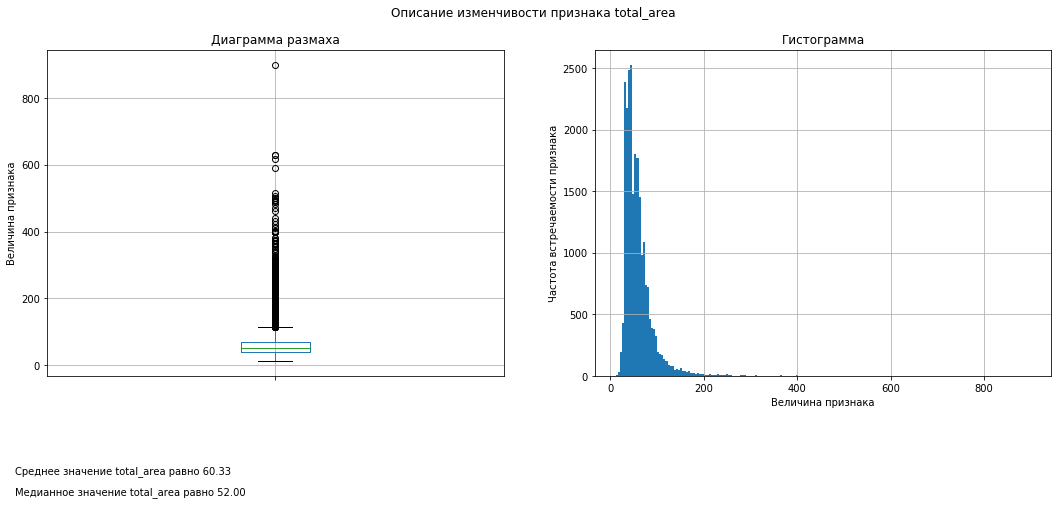

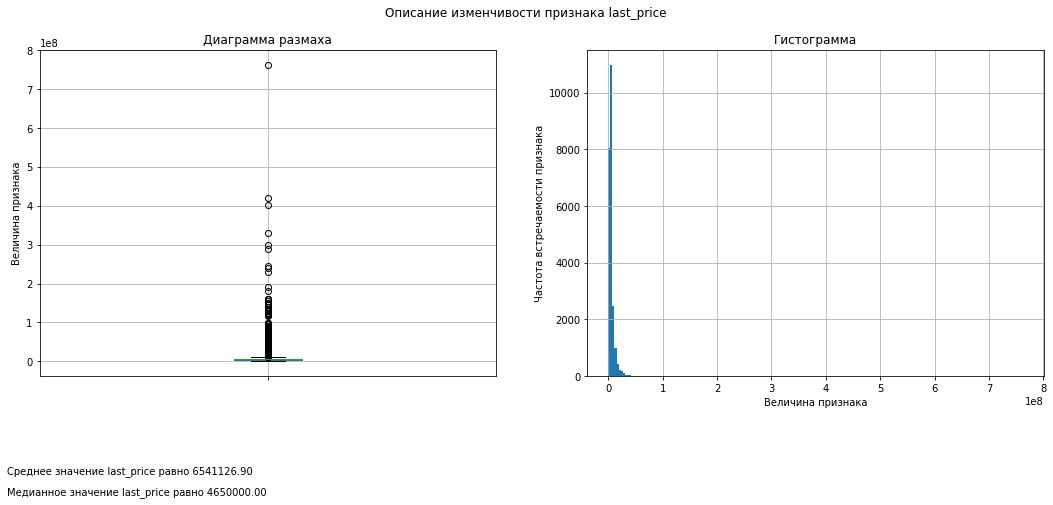

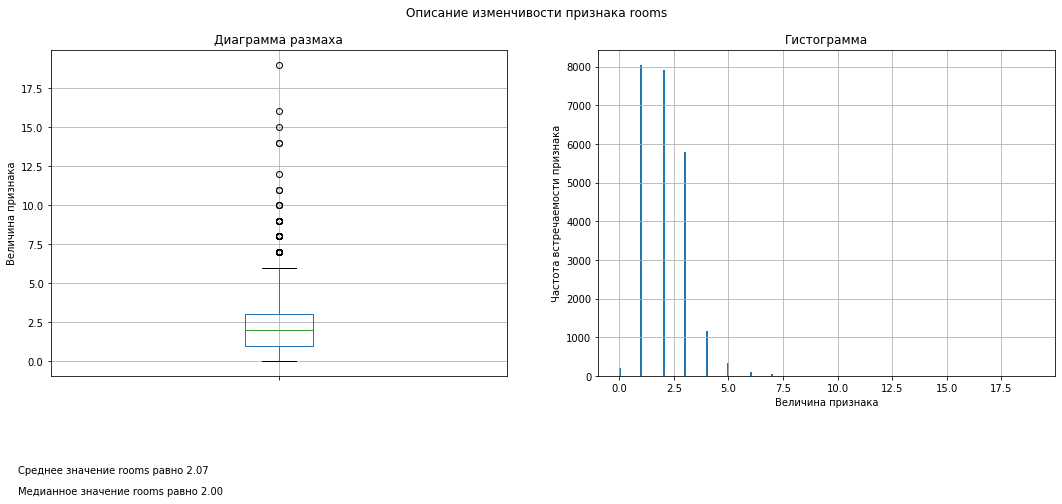

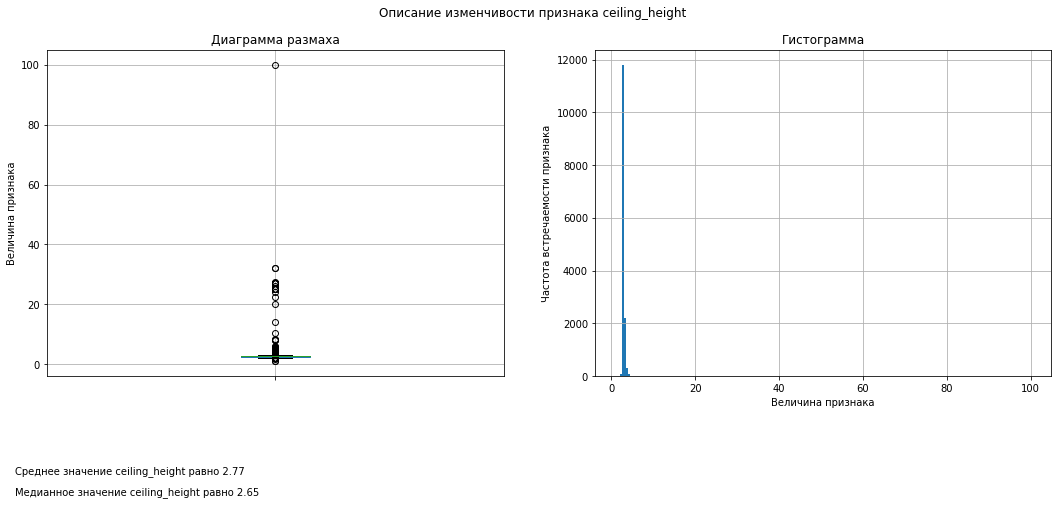

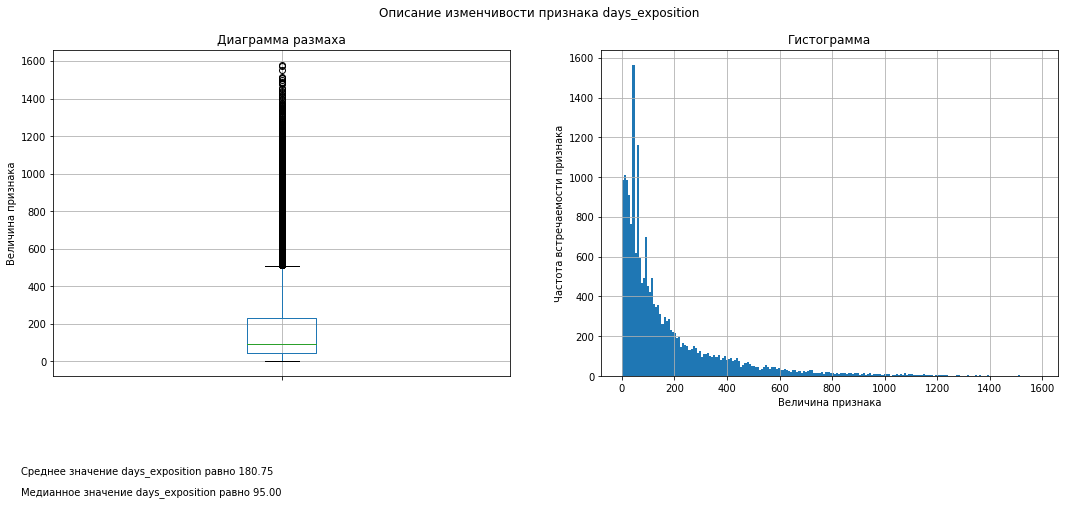

In [46]:
for factor in ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']:
    
    plt.figure(figsize=(18, 6)) # задаём размер сетки общей фигуры
    plt.suptitle('Описание изменчивости признака ' + str(factor))
    plt.figtext(0.1, -0.1, f"Среднее значение {factor} равно {data[factor].mean():.2f}")
    plt.figtext(0.1, -0.15, f"Медианное значение {factor} равно {data[factor].median():.2f}") 
    
    ax = plt.subplot(1,2,1)
    data.boxplot(column=factor, ax = ax);
    ax.set_xticklabels('');
    plt.title("Диаграмма размаха")
    plt.ylabel("Величина признака")

    
    data[factor].hist(ax=plt.subplot(1,2,2), 
                    bins=200,     
                    ); 
    plt.title("Гистограмма")
    plt.xlabel("Величина признака")
    plt.ylabel("Частота встречаемости признака")

Итак, для каждого признака обнаружена группа выбросов, исключение которой сделает распределение похожим на пуассоновское.

Отдельно дополнительно исследуем гистограмму длительность публикации объявлений о продаже. На полной гистограмме видны некоторые выраженные пики, рассмотрим их ближе, построив гистограмму по срезу данных.

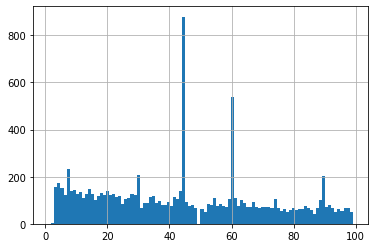

In [47]:
data.query('days_exposition<100')['days_exposition'].hist(bins=100);

Похоже, пики имеют некоторую периодичность. Нужно определить, в течение какого периода квартиры продаются чаще всего.

In [48]:
data.query('days_exposition<100')['days_exposition'].value_counts().sort_values(ascending=False).head(5)

45.0    879
60.0    538
7.0     234
30.0    208
90.0    203
Name: days_exposition, dtype: int64

7, 30, 45, 60, 90 дней - стандартный срок размещения объявления на риелторских сайтах. Этот вывод подтверждает то, что к данным в колонке `days_exposition` нужно относиться осторожно, потому что она вовсе не эквивалента длительности продажи. Ведь если объявление провисело на сайте 45 дней, вовсе не обязательно, что квартира была продана, скорее всего объявление было опубликовано вновь.

Проанализируем среднее и медианное время продажи квартир, исключив из датасета случаи с истекшим временем публикации

In [49]:
print('Среднее время продажи квартиры: ', 
      data.query('days_exposition not in [7, 30, 45, 60, 90]')['days_exposition'].mean(), end=' ')

Среднее время продажи квартиры:  187.78142637249871 

In [50]:
print('Медианное время продажи квартиры: ', 
      data.query('days_exposition not in [7, 30, 45, 60, 90]')['days_exposition'].median(), end=' ')

Медианное время продажи квартиры:  104.0 

Исследуем разброс признака

In [51]:
data.query('days_exposition not in [7, 30, 45, 60, 90]')['days_exposition'].describe()

count    19490.000000
mean       187.781426
std        222.877194
min          1.000000
25%         45.000000
50%        104.000000
75%        244.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [52]:
data.query('days_exposition not in [7, 30, 45, 60, 90]')['days_exposition'].median()

104.0

**Выводы**

Как правило, объявления закрываются в течение 104 дней. Все объявления, закрытые раньше 45 дней, можно считать нехарактерными или даже подозрительными. Если квартира остается опубликованной 244 дня и дольше, скорее всего с ней также какие-то проблемы.

### Исключение выбивающихся значений

Анализ данных показал, что во многих столбцах присутствуют выбросы, из-за которых распределение приобретает нехарактерный 
вид. Поэтому напишем функцию, определяющую границу усов (по полтора межквартильных размаха от первого и третьего 
квартилей) для основных параметров: цена, общая площадь, число комнат, высота потолков и срок размещения объявления.

In [53]:
def get_whiskers(col, df):
    
    first_quartile = df[col].quantile(0.25)
    third_quartile = df[col].quantile(0.75)
    
    left_border = first_quartile - 1.5*(third_quartile-first_quartile)
    right_border = third_quartile + 1.5*(third_quartile-first_quartile)
    
    return(left_border, right_border)

Из-за того, что данные смещены, квартили отражают не совсем корректную картину. Поэтому, прежде чем по данным диаграммы размаха принимать решение об исключении данных, нужно вручную, опираясь на эмпирический опыт, оценить адекватность этих границ.

In [54]:
left_last_price, right_last_price = get_whiskers('last_price', data)

In [55]:
print(f'Нижняя граница признака: {round(left_last_price)}\nВерхняя граница признака: {round(right_last_price)}')

Нижняя граница признака: -1698500
Верхняя граница признака: 11897500


Рассмотрим самые дешевые и дорогостоящие предложения из датасета

In [56]:
data[['locality_name', 'last_price', 'total_area']].sort_values('last_price')

,locality_name,last_price,total_area
8793,санкт-петербург,12190.0,109.0
17456,сланцы,430000.0,30.4
14911,свирь,430000.0,54.0
16274,старополье,440000.0,40.0
17676,ям-тесово,450000.0,36.5
...,...,...,...
15651,санкт-петербург,300000000.0,618.0
1436,санкт-петербург,330000000.0,190.0
14706,санкт-петербург,401300000.0,401.0
19540,санкт-петербург,420000000.0,900.0


Очевидно, цена на недвижимость не может быть равна 12190 рублям, скорее всего, имелись в виду тысячи рублей, но наверняка знать мы этого не можем. А вот цена на квартиру в Сланцах или на станции Свирь, согласно объявлениям Avito, вполне может начинаться от 400 тысяч рублей. Поэтому изменим нижнюю границу выборки.

Что касается верхней границы, то она определяется сегментом элитной недвижимости, где ценообразование и общие тренды  отличаются, поэтому если ограничить выборку ценой в 25 млн, то мы потеряем лишь около 500 записей, каждая из которых достаточно уникальна и не добавит к корреляции значимых результатов.

In [57]:
data[['locality_name', 'last_price', 'total_area']].sort_values('last_price').tail(500)

,locality_name,last_price,total_area
6991,санкт-петербург,24821600.0,81.7
7997,санкт-петербург,24900000.0,230.0
18977,санкт-петербург,24900000.0,129.0
4948,санкт-петербург,24900000.0,126.0
681,санкт-петербург,24900000.0,249.0
...,...,...,...
15651,санкт-петербург,300000000.0,618.0
1436,санкт-петербург,330000000.0,190.0
14706,санкт-петербург,401300000.0,401.0
19540,санкт-петербург,420000000.0,900.0


In [58]:
left_last_price, right_last_price = 0.4*10e5, 25*10e5

Исследуем признак общей площади

In [59]:
left_total_area, right_total_area = get_whiskers('total_area', data)

In [60]:
print(f'Нижняя граница признака: {round(left_total_area)}\nВерхняя граница признака: {round(right_total_area)}')

Нижняя граница признака: -5
Верхняя граница признака: 114


In [61]:
data[['locality_name', 'last_price', 'total_area']].sort_values('total_area').head(3)

,locality_name,last_price,total_area
19904,санкт-петербург,2400000.0,12.0
19807,санкт-петербург,3800000.0,13.0
17961,санкт-петербург,1400000.0,13.0


In [62]:
data[['locality_name', 'last_price', 'total_area']].sort_values('total_area').tail(230)

,locality_name,last_price,total_area
3440,санкт-петербург,14980000.0,200.0
8355,санкт-петербург,60309900.0,200.0
679,петергоф,13700000.0,200.0
1706,санкт-петербург,62171920.0,200.3
1766,санкт-петербург,53800000.0,201.0
...,...,...,...
5358,санкт-петербург,65000000.0,590.0
15651,санкт-петербург,300000000.0,618.0
3117,санкт-петербург,140000000.0,631.0
12859,санкт-петербург,140000000.0,631.2


Из таблиц следует, что реальная площадь квартир начинается от 12 квадратных метров ~~(как говорится: "кажется смешным, но люди покупают")~~. Самые просторные квартиры, от 200 квадратных метров, насчитывают всего 230 объявлений, поэтому их из выборки можно исключить

In [63]:
left_total_area, right_total_area = 12, 200

Исследуем объекты по количеству комнат

In [64]:
left_rooms, right_rooms = get_whiskers('rooms', data)

In [65]:
print(f'Нижняя граница признака: {round(left_rooms)}\nВерхняя граница признака: {round(right_rooms)}')

Нижняя граница признака: -2
Верхняя граница признака: 6


Мы уже знаем, что количество комнат начинается от нуля (квартиры-студии). Определим подходящую верхнюю границу

In [66]:
data.query('rooms>6')['rooms'].count()

90

Шесть комнат - разумный предел с учетом популярности молодежных коммунальных квартир, объектов с семью комнатами и больше всего 90.

In [67]:
left_rooms, right_rooms = 0, 6

Оценим разброс высоты потолков

In [68]:
left_ceiling_height, right_ceiling_height = get_whiskers('ceiling_height', data)

In [69]:
print(f'Нижняя граница признака: {round(left_ceiling_height)}\nВерхняя граница признака: {round(right_ceiling_height)}')

Нижняя граница признака: 2
Верхняя граница признака: 3


Границы не очень верны, определим их самостоятельно

In [70]:
display(f'Потолки ниже 2.5 м в {data.query("ceiling_height<2.5")["ceiling_height"].count()} квартирах')
display(f'Потолки выше 4 м в {data.query("ceiling_height>4")["ceiling_height"].count()} квартирах')

'Потолки ниже 2.5 м в 73 квартирах'

'Потолки выше 4 м в 75 квартирах'

Выглядит правдоподобно

In [71]:
left_ceiling_height, right_ceiling_height = 2.5, 4

Применим функцию определения "границ адекватности" значения ко всем значимым параметрам, и пометим соответствующие строки специальным маркером: typycal_factor, где в качестве фактора будет отмечен текущий признак. В строках присутствуют NaN, поэтому необходимо добавить в сравнение с "усами" условие, приравнивающее NaN к невыбивающимся признакам, иначе будет отсечено слишком большое количество записей.

In [72]:
# словарь с границами значений каждого признака

borders_dict={'last_price':[left_last_price, right_last_price],
              'total_area':[left_total_area, right_total_area],
              'rooms':[left_rooms, right_rooms],
              'ceiling_height':[left_ceiling_height, right_ceiling_height],
             }

In [73]:
significant_cols = ['last_price', 'total_area', 'rooms', 'ceiling_height']

In [74]:
# ('typical_'+str(col)) - конструкция для создания строки вида 'typical_last_price'

for col in significant_cols:
    left, right = borders_dict[col][0], borders_dict[col][1]
    
    
    data['typical_'+col] = (left<=data[col]) & (data[col]<=right) | data[col].isna()    #  устойчивость к NaN

    bad_to_total_values_ratio = (
        data[data['typical_'+col]==False]['typical_'+col].count()/
        data.shape[0]
          )
    
    print('Очистка выбросов в параметре {} удалит {:.1%} значений'.format(col,bad_to_total_values_ratio),'\n',
         f'Левая граница: {left:.2f}', '\n', f'Правая граница: {right:.2f}', '\n')

Очистка выбросов в параметре last_price удалит 2.0% значений 
 Левая граница: 400000.00 
 Правая граница: 25000000.00 

Очистка выбросов в параметре total_area удалит 1.0% значений 
 Левая граница: 12.00 
 Правая граница: 200.00 

Очистка выбросов в параметре rooms удалит 0.4% значений 
 Левая граница: 0.00 
 Правая граница: 6.00 

Очистка выбросов в параметре ceiling_height удалит 0.6% значений 
 Левая граница: 2.50 
 Правая граница: 4.00 



Запись условия удовлетворения четырем признакам может быть слишком массивной, поэтому введем еще один параметр, отражающий то, выбивается ли запись хотя по одному признаку. 

In [75]:
data['typical_total'] = (data['typical_last_price']&
                         data['typical_total_area']&
                         data['typical_rooms']&
                         data['typical_ceiling_height']
                        )

In [76]:
print(f'''{data[data["typical_total"]==True]["typical_total"].count() / 
          data["typical_total"].count():.1%} записей не выбиваются ни по одному из параметров''')

97.1% записей не выбиваются ни по одному из параметров


Также для удобства сохраним очищенный датасет в отдельный датафрейм

In [77]:
data_filtered = data.query('typical_total==True').reset_index(drop=True)

In [78]:
# КОД РЕВЬЮЕРА

data_filtered[['last_price', 'total_area','rooms', 'ceiling_height' ]].describe().loc[['min', 'max']]

,last_price,total_area,rooms,ceiling_height
min,430000.0,12.0,0.0,2.5
max,25000000.0,200.0,6.0,4.0


Повторим построение диаграмм размаха и гистограмм для данных, очищенных от выбросов.

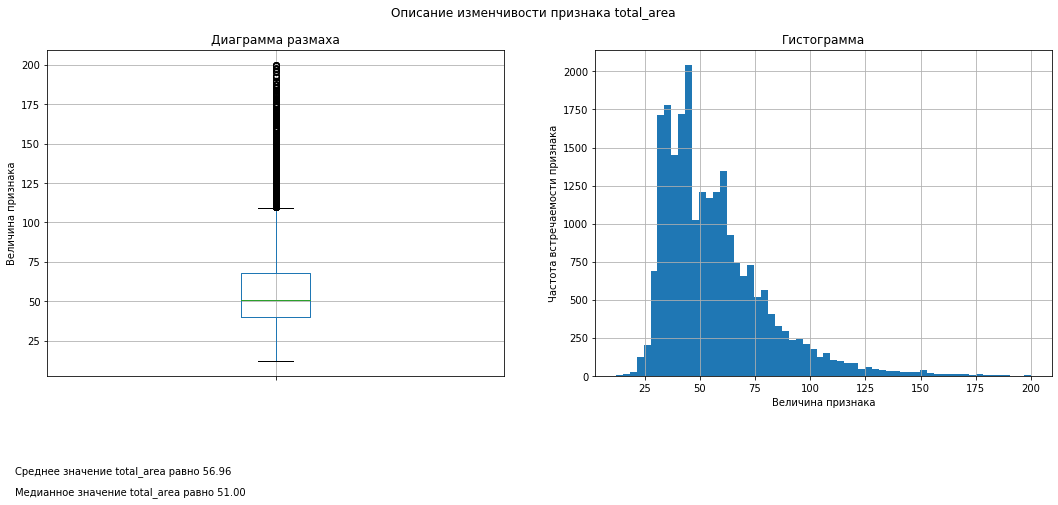

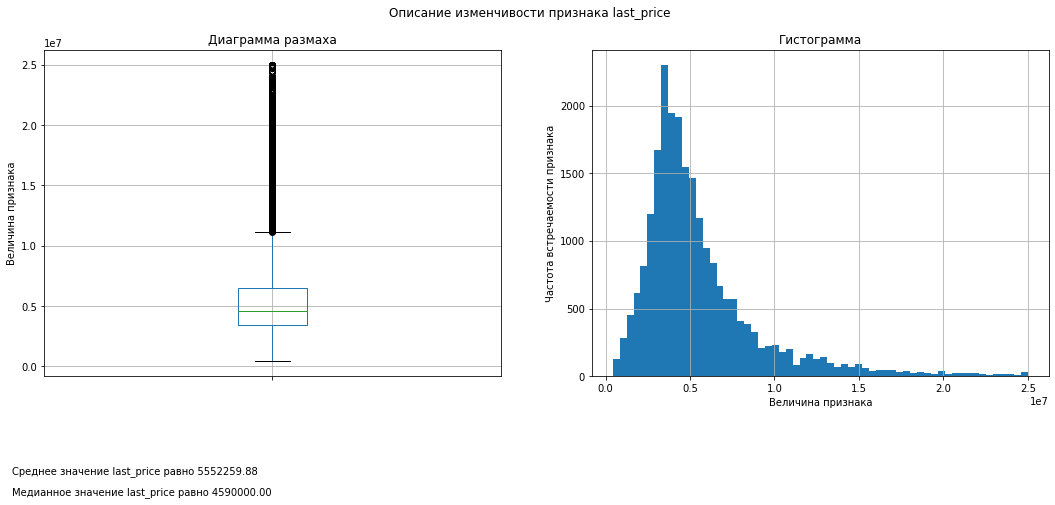

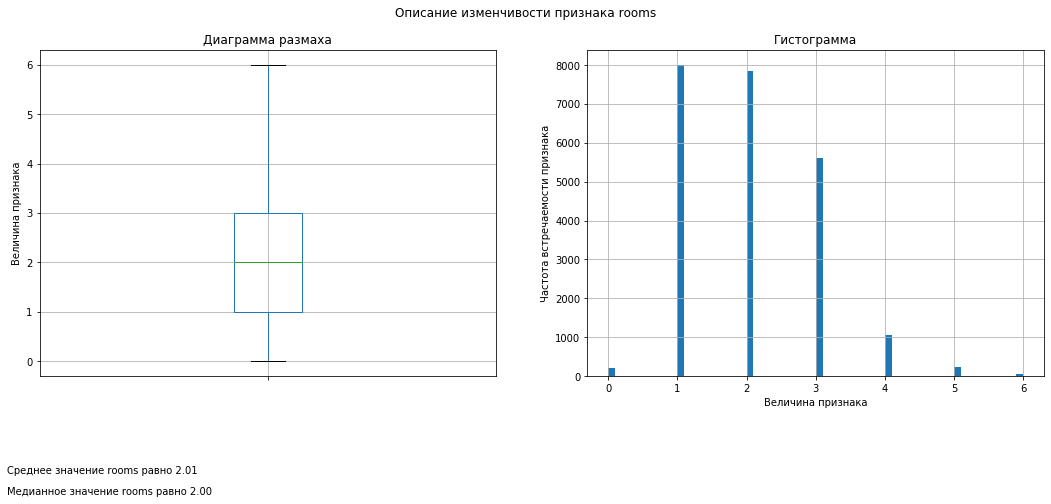

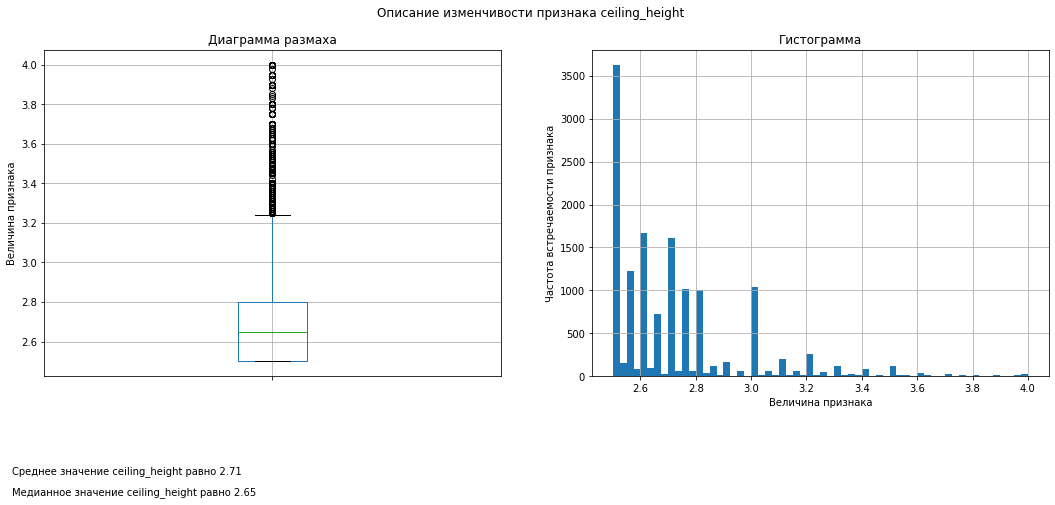

In [79]:
for factor in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    
    plt.figure(figsize=(18, 6)) # задаём размер сетки общей фигуры
    
    plt.suptitle('Описание изменчивости признака ' + str(factor))
    plt.figtext(0.1, -0.1, f"Среднее значение {factor} равно {data_filtered[factor].mean():.2f}")
    plt.figtext(0.1, -0.15, f"Медианное значение {factor} равно {data_filtered[factor].median():.2f}") 
    
    ax = plt.subplot(1,2,1)
    data_filtered.boxplot(column=factor, ax = ax);
    ax.set_xticklabels('');
    plt.title("Диаграмма размаха")
    plt.ylabel("Величина признака")

    
    data_filtered[factor].hist(ax=plt.subplot(1,2,2), bins=60); 
    plt.title("Гистограмма")
    plt.xlabel("Величина признака")
    plt.ylabel("Частота встречаемости признака")

**Выводы**

Очевидно, что после очистки медиана и среднее стали ближе, а в целом распределение признаков приблизилось к пуассоновскому. 

### Факторы, влияющие на стоимость квартиры

Исследуем взаимосвязь всех численно измеримых факторов со стоимостью продажи квартиры. Для этого создадим список из всех численных факторов, найдем коэффициент корреляции Пирсона

In [80]:
numeric_factors = ['total_images', 'total_area', 'price_per_square_m',
       'exposition_year', 'exposition_year', 'exposition_month',
       'exposition_day', 'rooms', 'ceiling_height', 'floors_total',
       'living_area', 'living_to_total_area_ratio', 'floor',
       'kitchen_area', 'kitchen_to_total_area_ratio',
       'airports_nearest', 'city_centers_nearest', 'parks_around_3000',
       'parks_nearest', 'ponds_around_3000', 'ponds_nearest'
       ]

In [81]:
# создание словаря, в котором ключом будет являться коэффициент корреляции, а значением - имя признака.

factor_corr_dict= {}

for factor in numeric_factors:
    
    factor_corr_dict[round(data_filtered['last_price'].corr(data_filtered[factor]), 2)] = factor

factor_corr_dict

{0.16: 'total_images',
 0.78: 'total_area',
 0.67: 'living_area',
 -0.03: 'exposition_year',
 0.0: 'kitchen_area',
 -0.02: 'exposition_day',
 0.49: 'rooms',
 0.51: 'ceiling_height',
 0.1: 'floors_total',
 0.03: 'living_to_total_area_ratio',
 0.09: 'floor',
 -0.65: 'kitchen_to_total_area_ratio',
 -0.07: 'airports_nearest',
 -0.36: 'city_centers_nearest',
 0.18: 'parks_around_3000',
 0.06: 'parks_nearest',
 0.19: 'ponds_around_3000',
 -0.1: 'ponds_nearest'}

Получили словарь, отражающий коэффициент корреляции каждого из выбранных параметров с ценой объекта. Для вывода о степени зависимости двух признаков этого должно быть достаточно. Но выведем также диаграммы рассеяния для каждой пары коррелирующих признаков по мере снижения корреляции с учетом ее возможного отрицательного знака. Это может оказаться полезным для обнаружения нелинейной корреляции, когда на разных диапазонах характер корреляции признаков меняется.

In [82]:
# добавляем в словарь значимость коэффициента корреляции.

factor_order = {}
for key in factor_corr_dict:
    factor_order[sorted(factor_corr_dict, key=abs, reverse=True).index(key)] = factor_corr_dict[key]

# создаем список признаков, отсортированных по убыванию модуля коэффициента корреляции

factors_ordered_list = []
for item in sorted(factor_order):
    factors_ordered_list.append(factor_order[item])

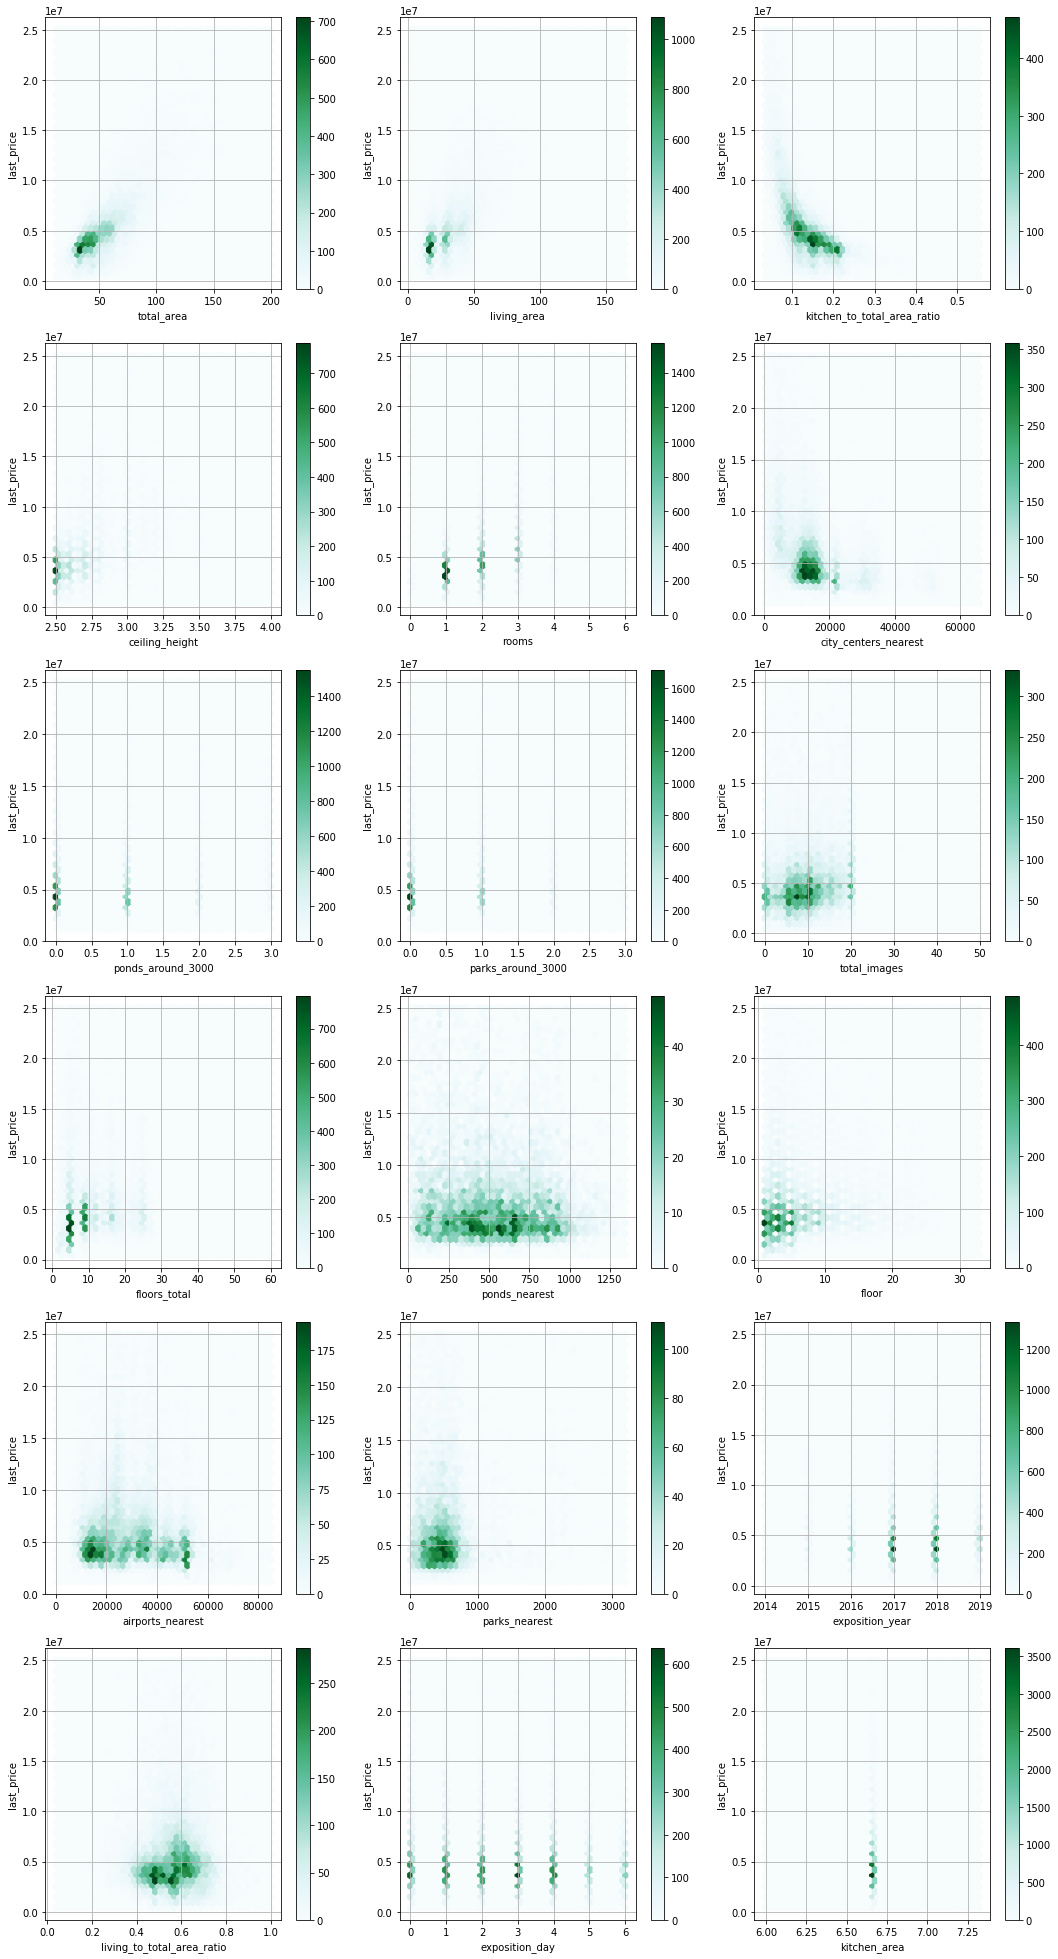

In [83]:
n_columns = 3
n_rows = len(factors_ordered_list) / n_columns

plt.figure(figsize=(18, 35))
for i, factor in enumerate(factors_ordered_list):
    
    data_filtered.plot(x= factor,
              y='last_price', 
              kind='hexbin',
              gridsize=40,
              sharex=False,
              grid=True,
              ax=plt.subplot(n_rows,n_columns,i+1))

Наибольшую корреляцию с ценой показали параметры, прямо или косвенно связанные с площадью помещения: цена за квадратный метр, жилая и общая площадь, число комнат. Увеличение площади кухни по отношению ко всей площади на цене сказывается сильно негативно. Закономерно увеличивает стоимость близость к центру и высота потолков. Как ни странно, хорошее описание с достаточным количеством фотографии влияет на цену почти так же, как наличие поблизости парков и прудов, хотя с поправкой на количество пропущенных значений этот выбор может быть опровергнут. А вот близость к аэропортам немного снижает цену, вероятно, из-за транспортных неудобств и шума по ночам.

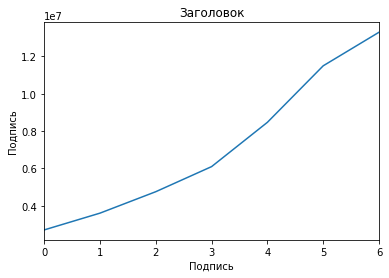

In [84]:
# КОД РЕВЬЮЕРА


data_filtered.groupby('rooms')['last_price'].median().plot()


plt.title('Заголовок')
plt.xlabel('Подпись')
plt.ylabel('Подпись')
plt.show()

Оценим различия медианной для всего датасета цены для первого этажа, последнего и прочих.

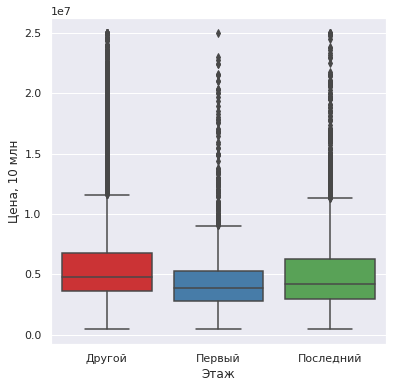

In [85]:
sns.set(rc={'figure.figsize':(6,6)})

sns.boxplot(y="last_price",
x="floor_type",
data=data_filtered,
palette="Set1",
).set(xlabel='Этаж', ylabel='Цена, 10 млн');

Очевидно, что при прочих равных спрос на квартиры на первом этаже меньше, чем на последнем и тем более на каком-то из промежуточных.

Проанализируем рынок недвижимости по годам. До очистки визуально немного выделялся 2017 год: тогда была зафиксирована рекордная сделка, а общее число сделок с элитной недвижимостью было заметно выше.

In [86]:
data.groupby('exposition_year')['last_price'].max()

exposition_year
2014     79339000.0
2015    180000000.0
2016    401300000.0
2017    763000000.0
2018    330000000.0
2019    289238400.0
Name: last_price, dtype: float64

In [87]:
data.query('last_price>100000000').groupby('exposition_year')['last_price'].count()

exposition_year
2015     6
2016     7
2017    14
2018     6
2019     4
Name: last_price, dtype: int64

Выведем основные статистические показатели по очщенному датасету, включая медиану, для общей цены и квадратного метра объекта.

In [88]:
year__total_price=data_filtered.groupby('exposition_year')['last_price'].describe()

year__total_price.insert(2,'median', data_filtered.groupby('exposition_year')['last_price'].median())

year__total_price

,count,mean,median,std,min,25%,50%,75%,max
exposition_year,,,,,,,,,
2014,123.0,8.787425e+06,7100000.0,5.731899e+06,1200000.0,4150000.0,7100000.0,12168000.0,25000000.0
2015,1109.0,6.340502e+06,5170000.0,4.080039e+06,650000.0,3700000.0,5170000.0,7399000.0,25000000.0
2016,2672.0,5.516466e+06,4450000.0,3.523239e+06,490000.0,3350000.0,4450000.0,6500000.0,25000000.0
2017,7936.0,5.454559e+06,4450000.0,3.525872e+06,450000.0,3300000.0,4450000.0,6400000.0,25000000.0
2018,8327.0,5.401890e+06,4500000.0,3.436208e+06,430000.0,3350000.0,4500000.0,6400000.0,25000000.0
2019,2796.0,5.856637e+06,5000000.0,3.564909e+06,430000.0,3700000.0,5000000.0,6990000.0,25000000.0


In [89]:
year_meter_price=data_filtered.groupby('exposition_year')['price_per_square_m'].describe()

year_meter_price.insert(2,'median', data_filtered.groupby('exposition_year')['price_per_square_m'].median())

year_meter_price

,count,mean,median,std,min,25%,50%,75%,max
exposition_year,,,,,,,,,
2014,123.0,108190.748002,104545.454545,40536.132429,20338.983051,80367.219059,104545.454545,137227.840175,278099.652375
2015,1109.0,96430.025145,91935.483871,33597.441622,12542.372881,77096.774194,91935.483871,112307.692308,324675.324675
2016,2672.0,93331.076968,91068.376068,33241.435065,11587.301587,74188.207648,91068.376068,109207.872479,324727.272727
2017,7936.0,93835.138833,91935.483871,32685.214588,10714.285714,75000.000000,91935.483871,109210.526316,392354.124748
2018,8327.0,95696.603032,95469.798658,34641.507483,7962.962963,76086.956522,95469.798658,113436.355034,640422.350472
2019,2796.0,103166.815339,102773.375973,36437.950461,10185.185185,83078.962852,102773.375973,122453.804743,355555.555556


Итак, в сегменте обычного жилья в 2017 году ничего особенного не происходило, скорее наоборот, цена квадратного метра была одной из самых низких за шесть лет наблюдений. А высокое медианное значение цены квартир в 2014 году может связано с высокой ценой квадратного метра жилья, попавшего в выборку.

День недели и месяц публикации коррелируют с ценой жилья меньше всего. Здесь можно увидеть небольшие выраженные отличия, например, чуть меньшую цену в объявлениях, опубликованных в мае и июне, но скорее всего они носят случайный характер.

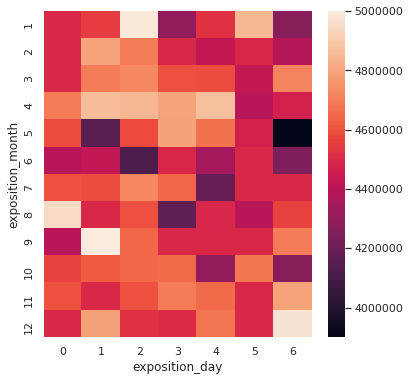

In [90]:
sns.heatmap(data_filtered.pivot_table(index='exposition_month', 
                             columns='exposition_day', 
                             values='last_price', 
                             aggfunc='median',
                             ));

### Анализ недвижимости по населенным пунктам

Изучим распределение цены на недвижимость для десяти крупнейших населенных пунктов Ленинградской области, попавших в датасет.

In [91]:
# Создание списка десяти крупнейших городов

top_localities = data_filtered.groupby('locality_name')['last_price'].count().sort_values(ascending=False).head(10)

top_localities

locality_name
санкт-петербург    15109
мурино               588
кудрово              471
шушары               440
всеволожск           396
пушкин               357
колпино              336
парголово            325
гатчина              306
выборг               234
Name: last_price, dtype: int64

Сделаем сводную таблицу с медианной ценой квадратного метра жилья для каждого из выбранных городов.

In [92]:
data_filtered.query('locality_name in @top_localities.index').pivot_table(index='locality_name', 
                                                                 values='price_per_square_m', 
                                                                 aggfunc='median').sort_values(by='price_per_square_m', 
                                                                                               ascending=False)

,price_per_square_m
locality_name,
санкт-петербург,104000.000000
пушкин,99706.744868
кудрово,95762.711864
парголово,91917.591125
мурино,86175.643522
шушары,76876.172608
колпино,74723.748474
гатчина,67860.569236
всеволожск,65789.473684


**Выводы**

Не удивительно, что на первом месте Санкт-Петербург. Цена квадратного метра почти вдвое выше, чем в Выборге, замыкающем топ-10. Немного дешевле жилье стоит в городах-сателлитах - Пушкине и Кудрово.

### Выделение центра города

Как правило, стоимость жилья уменьшается по мере удаления от центра города. Оценим, в пределах какого радиуса область Санкт-Петербурга можно назвать центром. Для этого добавим в датасет дополнительный столбец с расстоянием до центра в километрах

In [93]:
data_filtered.insert(data_filtered.columns.get_loc('city_centers_nearest')+1, 
            'km_to_center', 
            round(data_filtered['city_centers_nearest']/1000)
           )

Выведем сводную таблицу, ставящую в соответствие каждому радиусу медианное значение стимости жилья, квадратного метра, а также количество измерений, чтобы не делать поспешных выводов по слишком маленькой выборке.

In [94]:
saint_p_center = (data_filtered.query('locality_name == "санкт-петербург"')
                  .groupby('km_to_center').agg({'price_per_square_m': 'median', 'last_price': ['median', 'count']})
                 )

saint_p_center.columns = ['price_per_square_m_median','last_price_median','values_number']

saint_p_center.head(10)

,price_per_square_m_median,last_price_median,values_number
km_to_center,,,
0.0,109031.632653,8795000.0,12
1.0,122448.979592,9950000.0,159
2.0,116981.132075,9260000.0,262
3.0,106911.447084,8150000.0,321
4.0,114473.684211,8600000.0,621
5.0,125098.425197,8700000.0,808
6.0,123014.959724,7907820.0,517
7.0,119536.574284,6862527.5,352
8.0,121875.000000,7200000.0,571


По таблице видно, что стоимость действительно падает по мере удаления от центра. Но этот тренд лучше всего отследить по графику.

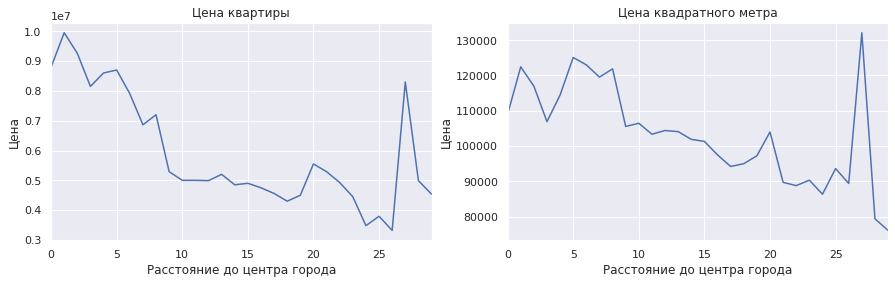

In [95]:
plt.figure(figsize=(15, 4)) # задаём размер сетки

ax = plt.subplot(1,2,1)
#ax.set_xticklabels('');
saint_p_center['last_price_median'].plot(grid=True, ax=ax);
plt.xlabel('Расстояние до центра города');
plt.ylabel('Цена');
plt.title("Цена квартиры");

ax = plt.subplot(1,2,2)
saint_p_center['price_per_square_m_median'].plot(grid=True, ax=ax);
plt.xlabel('Расстояние до центра города');
plt.ylabel('Цена');
plt.title("Цена квадратного метра");

**Выводы**

На обоих графиках виден скачок цены при переходе от восьмого к девятому километру. Не считая искажений, вызванного расчетом цены жилья по немногочисленным записям, характер параметра практически монотонно убывающий.

### Анализ квартир в центре Санкт-Петербурга

Сравним основные характеристики для квартир в центре и остальных. Для этого построим диаграммы размаха по каждому из признаков

In [96]:
center_apartments = data_filtered.query('km_to_center<=8')

suburban_apartments = data_filtered.query('km_to_center>8')

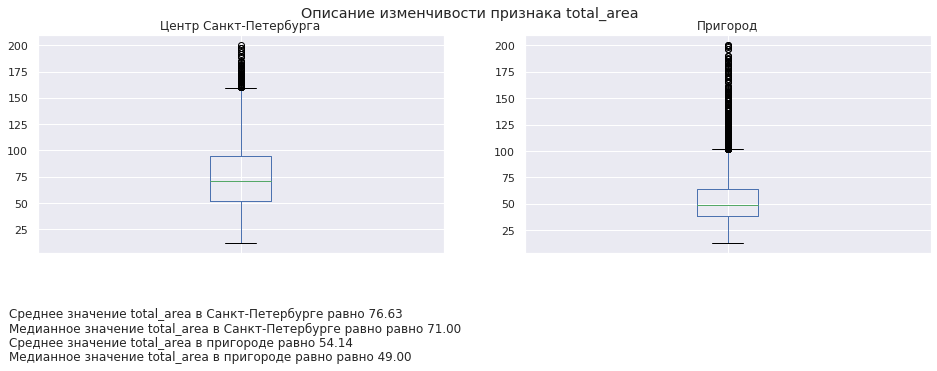

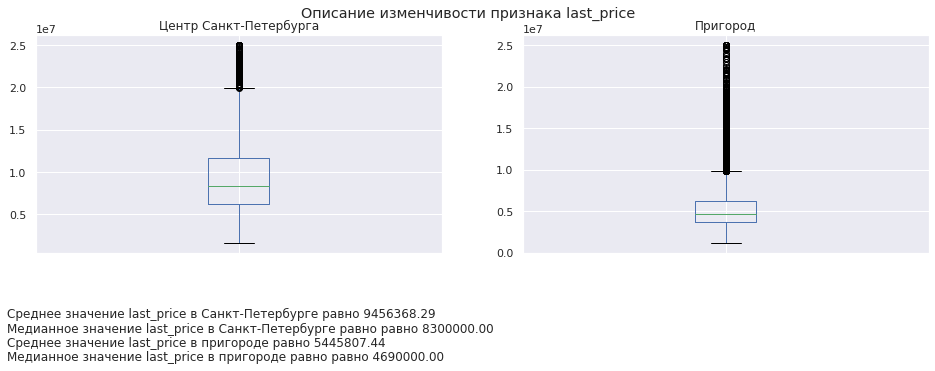

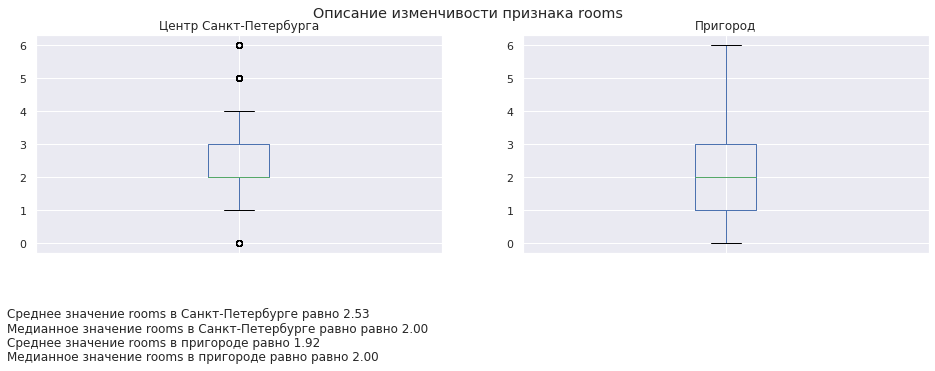

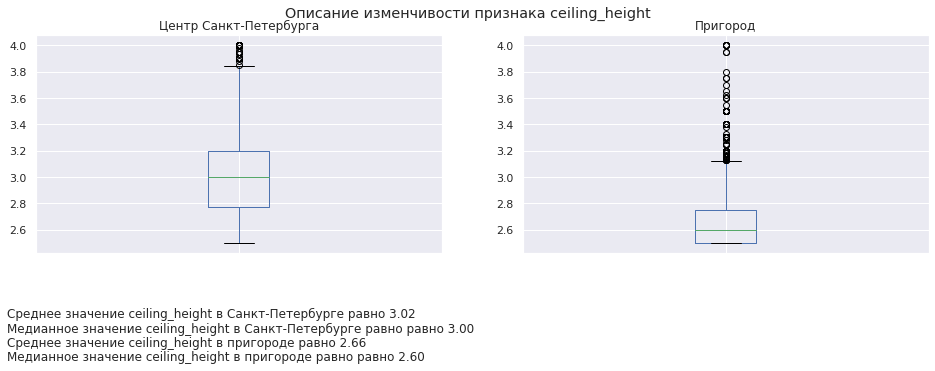

In [97]:
for factor in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    
    plt.figure(figsize=(16, 4)) # задаём размер сетки
    plt.suptitle('Описание изменчивости признака ' + str(factor))
    
    plt.figtext(0.1, -0.1, f"Среднее значение {factor} в Санкт-Петербурге равно {center_apartments[factor].mean():.2f}")
    plt.figtext(0.1, -0.15, f"Медианное значение {factor} в Санкт-Петербурге равно равно {center_apartments[factor].median():.2f}")
    
    plt.figtext(0.1, -0.2, f"Среднее значение {factor} в пригороде равно {suburban_apartments[factor].mean():.2f}")
    plt.figtext(0.1, -0.25, f"Медианное значение {factor} в пригороде равно равно {suburban_apartments[factor].median():.2f}") 
    
    ax = plt.subplot(1,2,1)
    center_apartments.boxplot(column=factor, ax=ax);
    ax.set_xticklabels('');
    plt.title("Центр Санкт-Петербурга")
    
    ax = plt.subplot(1,2,2)
    suburban_apartments.boxplot(column=factor, ax=ax);
    ax.set_xticklabels('');
    plt.title("Пригород")

Выводы после сравнения квартир в центре и спальных районах следующие: в центре часто встречаются многокомнатные квартиры, те самые знаменитые питерские коммуналки. Если в спальных районах 3 комнаты и более встречаются нечасто, то в центре - даже 4 комнаты не редкость. Хотя медианное значение количества комнат совпадает: 2. С различием в числе комнат связана и большая общая площадь квартир. Это наравне с большей ценой квадратного метра влияет на цену объекта: в центре квартиры примерно на 35% дороже. Медианная высота потолка в старом фонде также заметно выше и достигает трех метров при 2.6 в новостройках. Хотя при этом не секрет, что в исторических квартирах высота потолка высота может достигать и пяти метров, что подтверждается первичным анализом данных.

Выведем таблицу корреляции для квартир в центре и сравним ее с полученными ранее коэффициентами корреляции для всего датасета. Факторами для сравнения выступят все численные параметры

In [98]:
correlations_dict = {'center_apartments':[], 'overall_data':[]}

for factor in numeric_factors:
    correlations_dict['center_apartments'].append(center_apartments['last_price'].corr(center_apartments[factor]))
    correlations_dict['overall_data'].append(data_filtered['last_price'].corr(data_filtered[factor]))
    
correlations_data = pd.DataFrame(data = correlations_dict, index = numeric_factors)  

In [99]:
round(correlations_data.sort_values('center_apartments', ascending=False), 2)

,center_apartments,overall_data
total_area,0.74,0.78
living_area,0.62,0.67
price_per_square_m,0.50,0.67
rooms,0.46,0.49
ceiling_height,0.27,0.51
floor,0.15,0.09
total_images,0.13,0.16
floors_total,0.11,0.10
parks_around_3000,0.09,0.18
ponds_around_3000,0.07,0.19


Сравнить корреляцию признаков по двум группам можно при помощи тепловой карты.

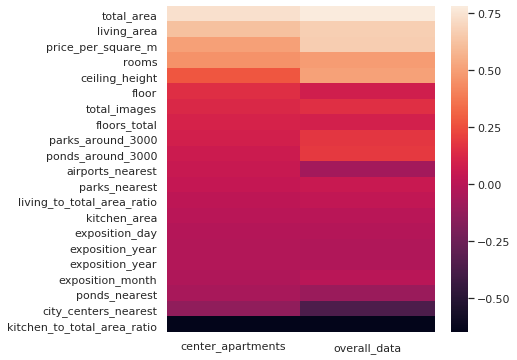

In [100]:
sns.heatmap(correlations_data.sort_values('center_apartments', ascending=False));

Для проверки характера корреляции построим для каждого признака наиболее наглядный график

Количество комнат изменяется дискретно, поэтому диаграмма рассеняния не так нагляда, как простой график

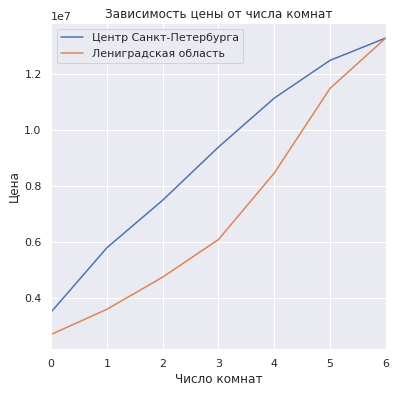

In [101]:
ax = center_apartments.groupby('rooms')['last_price'].median().plot();
data_filtered.groupby('rooms')['last_price'].median().plot(ax = ax);
ax.legend(["Центр Санкт-Петербурга", "Лениградская область"]);

plt.title('Зависимость цены от числа комнат');
plt.xlabel('Число комнат');
plt.ylabel('Цена');

И для центра, и для области цена примерно одинаково коррелирует с количеством комнат.

Тип этажа (первый, последний, другой) тоже изменеятся дискретно

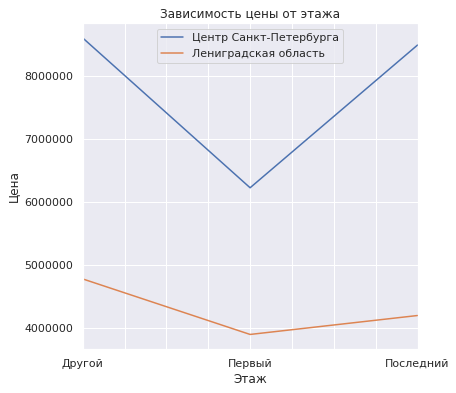

In [102]:
ax = center_apartments.groupby('floor_type')['last_price'].median().plot();
data_filtered.groupby('floor_type')['last_price'].median().plot(ax = ax);
ax.legend(["Центр Санкт-Петербурга", "Лениградская область"]);

plt.title('Зависимость цены от этажа');
plt.xlabel('Этаж');
plt.ylabel('Цена');

Выводы подтверждаются, квартиры на первом этаже, как правило, дешевле. На графике наблюдается более резкое снижение цены на такие квартиры в центре Санкт-Петербурга, одна в процентах падения примерно схожи.

Площадь квартры не является дискретным параметром. Причиной этому служит большое количество стандартов жилых домов, различные частные перепланировки и так далее. Поэтому корреляцию этого признака лучше смотреть по диаграмме рассеяния.

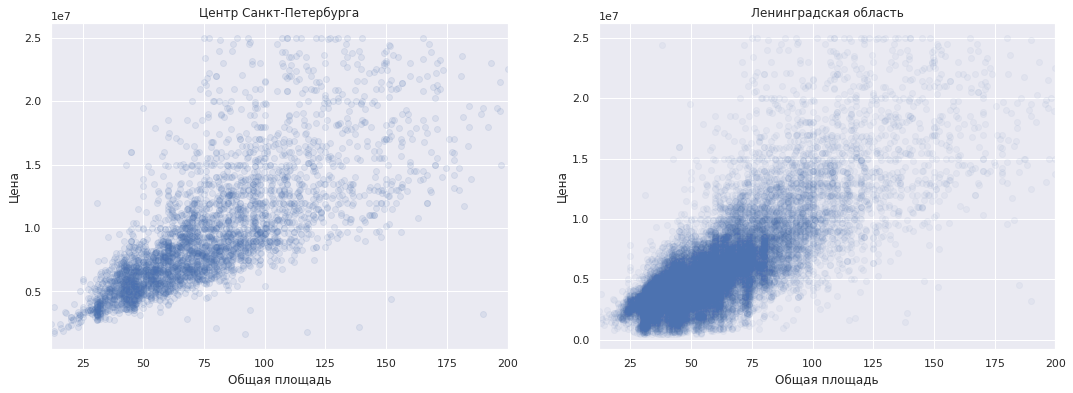

In [103]:
plt.figure(figsize=(18, 6))

ax = plt.subplot(1,2,1);
center_apartments.plot(x='total_area', 
                       y='last_price', 
                       style='o',  
                       alpha=0.1, 
                       ax=ax, 
                       legend=False);
plt.title('Центр Санкт-Петербурга');
plt.xlabel('Общая площадь');
plt.ylabel('Цена');

ax = plt.subplot(1,2,2);
data_filtered.plot(x='total_area', 
                   y='last_price', 
                   style='o', 
                   alpha=0.05, 
                   ax=ax, 
                   legend=False);
plt.title('Ленинградская область');
plt.xlabel('Общая площадь');
plt.ylabel('Цена');

Общий тренд очень похож на линейный.

Рассмотрим влияние удаленности объекта от центра Санкт-Петербурга.

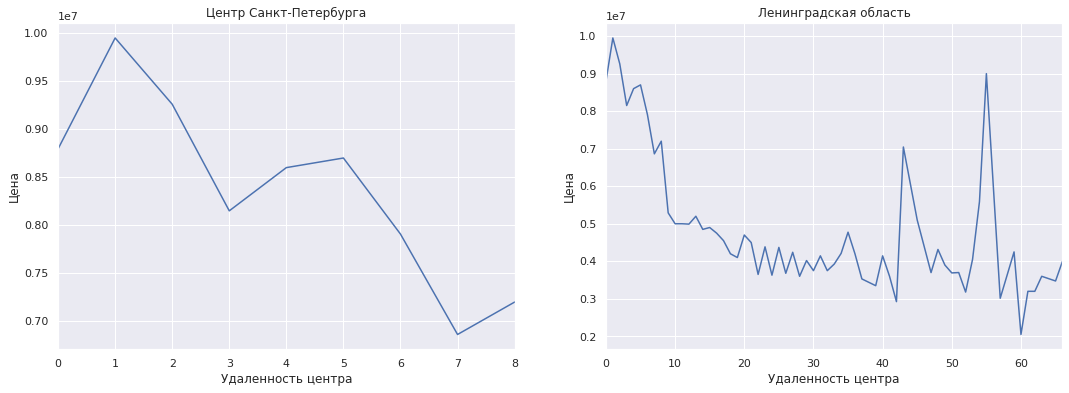

In [104]:
plt.figure(figsize=(18, 6))

ax = plt.subplot(1,2,1);
center_apartments.groupby('km_to_center')['last_price'].median().plot();
plt.title('Центр Санкт-Петербурга');
plt.xlabel('Удаленность центра');
plt.ylabel('Цена');

ax = plt.subplot(1,2,2);
data_filtered.groupby('km_to_center')['last_price'].median().plot();
plt.title('Ленинградская область');
plt.xlabel('Удаленность центра');
plt.ylabel('Цена');

Выводы можно сделать следующие: В пределах радиуса 10-12 километров цена недвижимости сильно падает с удалением от центра. Затем , в пределах кольца 10-40 км цена падает не так сильно, а на удалении 45-55 км появляются новые центры притяжения - областные центры с высокой стоимостью жилья.

Рассмотрим взаимосвязь года публикации и цены объявления

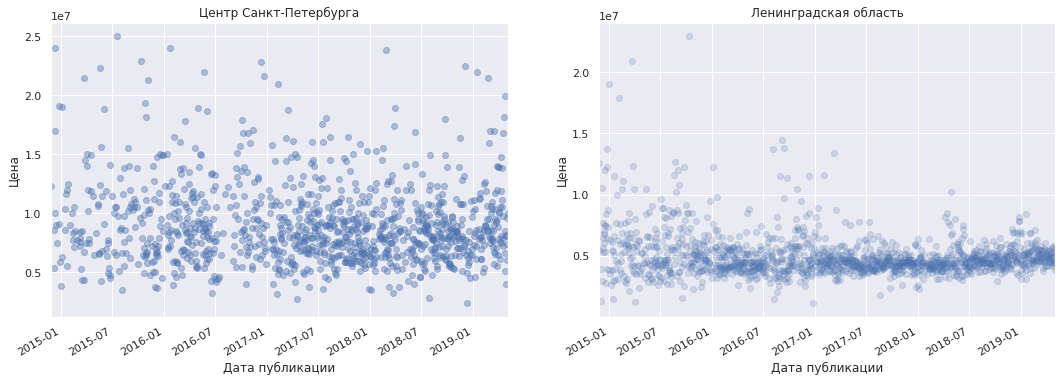

In [105]:
plt.figure(figsize=(18, 6))

ax = plt.subplot(1,2,1);
center_apartments.groupby('first_day_exposition')['last_price'].median().plot(x='total_area', 
                                                                              y='last_price', 
                                                                              style='o', 
                                                                              alpha=0.4, 
                                                                              ax=ax, 
                                                                              legend=False);
plt.title('Центр Санкт-Петербурга');
plt.xlabel('Дата публикации');
plt.ylabel('Цена');

ax = plt.subplot(1,2,2);
data_filtered.groupby('first_day_exposition')['last_price'].median().plot(x='total_area', 
                                                                          y='last_price', 
                                                                          style='o', 
                                                                          alpha=0.2, 
                                                                          ax=ax, 
                                                                          legend=False);
plt.title('Ленинградская область');
plt.xlabel('Дата публикации');
plt.ylabel('Цена');

Корреляции практически нет.

**Выводы**

Корреляция основных параметров для квартир в центре в целом напоминают общую для города картину. Различия выражаются в виде контрастных линий в столбце с полным списком. Можно сказать, что при покупке жилья в спальных районах покупатели больше ориентируются на показатели практичности: на цену и высоту потолков. Спрос на высокие потолки скорее всего объясняется текущим трендом на многоэтажность и компактность жилья. Выше ценится достаточное количество фотографий объекта, поскольку мало кому захочется ехать в пригород и проводить "разведку боем". Удаленность от центра сильно снижает цену только для спальных районов, а жителям исторических зданий не так принципиально, что второй километр, что седьмой - центр есть центр.

## Общий вывод

Итак, в ходе исследования были сделаны следующие основные выводы

1. Значительнее всего на стоимость жилья влияет его площадь, а также удаленность от центра.
2. Центр Санкт-Петербурга можно ограничить радиусом 5-8 км. В пределах 
3. Характеристики жилья в центре и на периферии отличаются. Квадратный метр жилья в центре стоит в среднем 120 тыс рублей, что на 25% выше, чем в среднем по области. Но полная цена на квартиры в центре в среднем составляет 8.3 млн. Это почти вдвое дороже, чем в области. Такое отличие объясняется архитектурными отличиями. Как правило, у квартир в центре выше потолки (3 метра и 2.65 м соответственно), часто больше комнат. Вследствие этого у квартир в центре больше общая площадь: медианные значения по группам составили 71 и 51 квадратный метр соответственно.
4. Общее наблюдение - пониженная цена на квартиры, расположенные на первом или последнем этаже.
5. Наиболее дорогое жилье находится в Санкт-Петербурге. Гораздо доступнее квартира в Выборге.
6. В среднем квартиры продаются в течение нескольких месяцев. Квартиры в центре за 126 дней, что выше показателя для всей Ленинградской области - 94 дня.
